In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline 

In [2]:
filepath = "datasets/DC_Properties.csv"

dcdf = pd.read_csv(filepath)
dcdf

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [18]:
dcdf.isnull().sum()

Unnamed: 0                 0
BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY          

In [17]:
dcdf.drop(['Unnamed: 0'], axis=1)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158952,1,0,Forced Air,Y,NaN,3,1,1938.0,2006.0,1938,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158953,1,0,Forced Air,Y,NaN,4,2,1938.0,2006.0,1938,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158954,2,0,Forced Air,Y,NaN,4,2,1920.0,2007.0,1920,...,-77.019420,Old City 2,040 B Old City 2,4801.0,NaN,Ward 6,477,-77.019422,38.911848,NW
158955,1,0,Warm Cool,Y,NaN,2,0,1965.0,NaN,1965,...,-77.018230,Southwest Waterfront,NaN,11000.0,NaN,Ward 6,504,-77.018232,38.872961,SW


In [23]:
dcdf['PRICE'].fillna((0), inplace=True)

In [24]:
dcdf['PRICE'].isnull().sum()

0

In [8]:
#Z-score standarization using method 1
mean = dcdf['PRICE'].mean()

#standard deviation of the column
std = dcdf['PRICE'].std()

#each value in column minus the mean and then divide by the standard deviation
dc_z_manual = (dcdf['PRICE'] - mean)/std
mean, std

(931351.5949336156, 7061324.955612032)

In [25]:
#Method 2, using scikitlearn
scaler = StandardScaler()

#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed
#'Glucose' is in double set of square brackets in order to make it a dataframe
dc_zscore = scaler.fit_transform(dcdf[['PRICE']])
dc_zscore.mean(), dc_zscore.std()

(3.3972236465061376e-18, 1.0)

In [26]:
dc_z_col = pd.Series(dc_zscore.reshape(-1))

In [27]:
dc_z_col

0         0.093292
1        -0.103334
2         0.273756
3         0.184332
4        -0.103334
            ...   
158952   -0.031525
158953   -0.028634
158954    0.004406
158955   -0.064709
158956   -0.103334
Length: 158957, dtype: float64

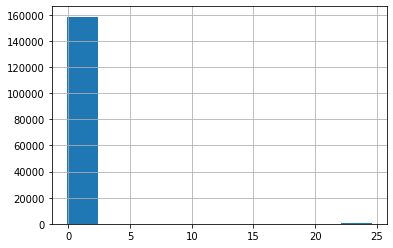

In [31]:
dc_z_col.hist()

In [28]:
#min max method
minmax_sc = MinMaxScaler()
dc_minmax = minmax_sc.fit_transform(dcdf[['PRICE']])
dc_minmax.mean(), dc_minmax.std()

(0.004187380819335499, 0.04052287142079813)

In [29]:
dc_mm_col = pd.Series(dc_minmax.reshape(-1))
dc_mm_col

0         0.007968
1         0.000000
2         0.015281
3         0.011657
4         0.000000
            ...   
158952    0.002910
158953    0.003027
158954    0.004366
158955    0.001565
158956    0.000000
Length: 158957, dtype: float64

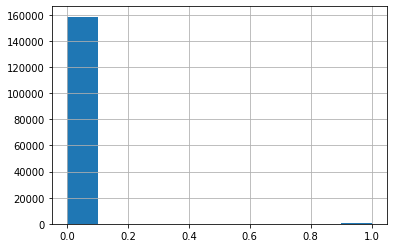

In [30]:
dc_mm_col.hist()